In [85]:
import pandas as pd
import numpy as np
import math

## Fix NA values, combine highly-related features

In [86]:
amesdf1 = pd.read_csv('train.csv', index_col=0)
amesdf1['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [87]:
#Import the CSV to make DF, count all NA values in the DF
amesdf1 = pd.read_csv('train.csv', index_col=0)
amesdf1cols = np.array(amesdf1.columns)
amesdf1nas = []
for i in range(len(amesdf1cols)):
    amesdf1nas.append(amesdf1[amesdf1cols[i]].isna().sum())
amesdf1summarydf = pd.DataFrame({'varnames': amesdf1cols, 'nas': amesdf1nas})

In [88]:
#Print the DF in descending order of number of NA values
amesdf1summarydf.sort_values(by='nas', ascending=False)

,varnames,nas
71,PoolQC,1453
73,MiscFeature,1406
5,Alley,1369
72,Fence,1179
56,FireplaceQu,690
2,LotFrontage,259
58,GarageYrBlt,81
63,GarageCond,81
57,GarageType,81
59,GarageFinish,81


In [89]:
#For most columns (as seen from the documentation), NA does not mean NA but that the house does not have that feature
#These aren't actually NAs, as they contain information
#We can replace NA with the word 'No', to indicate the feature doesn't exist for this house
#Define function to do this for multiple column names
def ConvertNaToNone(df, varlist):
    amescopy = df.copy()
    for var in varlist:
        series = amesdf1[var]
        series[series.isna()] = 'No'
        amescopy[var] = series
    return amescopy   

In [90]:
#Apply this function with our list of features containing NA, and convert the "No" in MasVnrType to "None" to match the other values
amesNoNAs = ConvertNaToNone(amesdf1, ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageYrBlt', 'GarageCond', 'BsmtExposure', 'BsmtFinType2', 'GarageType', 'GarageFinish', 'GarageQual', 'BsmtCond', 'BsmtQual', 'BsmtFinType1', 'MasVnrType'])
amesNoNAs['MasVnrType'] = amesNoNAs['MasVnrType'].str.replace('None', 'No')

C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [91]:
#Now, count NAs for the remaining features as we did above
amesNoNAcols = np.array(amesNoNAs.columns)
amesNoNAnas = []
for i in range(len(amesNoNAcols)):
    amesNoNAnas.append(amesNoNAs[amesNoNAcols[i]].isna().sum())
amesNoNAsummarydf = pd.DataFrame({'varnames': amesNoNAcols, 'nas': amesNoNAnas})
amesNoNAsummarydf.sort_values(by='nas', ascending=False)

,varnames,nas
2,LotFrontage,259
25,MasVnrArea,8
41,Electrical,1
51,KitchenAbvGr,0
58,GarageYrBlt,0
57,GarageType,0
56,FireplaceQu,0
55,Fireplaces,0
54,Functional,0
53,TotRmsAbvGrd,0


In [92]:
#For the one missing 'Electrical' entry, replace with the most common category
print(amesNoNAs['Electrical'].value_counts())
amesNoNAs.loc[amesNoNAs['Electrical'].isna(),'Electrical'] = 'SBrkr'
print(amesNoNAs['Electrical'].value_counts())

#For the two numerical entries (LotFrontage, MasVnrArea), replace with random sample of the non-NA values
amesNoNAs.loc[amesNoNAs['LotFrontage'].isna(), 'LotFrontage'] = np.random.choice(amesNoNAs['LotFrontage'].dropna(), size=259, replace=True)
amesNoNAs.loc[amesNoNAs['MasVnrArea'].isna(), 'MasVnrArea'] = np.zeros(8)

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64


In [93]:
#Sum all the row of the Series counting NA's in each column (total NAs in dataframe) to show all NA's are gone
np.sum(np.sum(amesNoNAs.isna()))

0

In [94]:
PureCategorical = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
                  'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Foundation', 'MasVnrType', 'Heating', 'CentralAir', 'Electrical',
                  'GarageType', 'SaleType','SaleCondition']
QuesCategorical = ['LotShape', 'Utilities']
OrdCategorical = ['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
                 'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond',
                 'PavedDrive', 'PoolQC','Fence']
JointFeatures = ['Condition1', 'Condition2', 'Exterior1st', 'Exterior2nd']
Numerical = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtScore', 'TotalBsmtSF', 'TotalSF',
            'PctLowQual', 'AboveGroundPct', 'TotalBath', 'Bedroom', 'Kitchen', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
            'GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea',
            'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
len(PureCategorical) + len(QuesCategorical) + len(OrdCategorical) + len(JointFeatures) + len(Numerical)

71

In [95]:
#NOTES
'''BsmtFinType1 and BsmtFinType2. Super problematic. These are if the person has 2 types of finished basement. 
Its partly ordinal and then contains corresponding SQFT values. I would propose combining these 2 numbers (give a 
score for the different finish types, then weight the average. And give 'No Basement' a score of zero for both metrics).
This will convert 5 total features (BsmtFinSF1, BsmtFinSF2, BsmtFinType1, BsmtFinType2, BsmtUnfSF into 1 (BsmtScore))'''

'''FullBath, HalfBath, BsmtFullBath, BsmtHalfBath could realistically be converted to TotalBath, removing 3 features'''

'''1stFlrSF and 2ndFltSF could realistically be converted to TotalSF'''

'''LowQualFinSF/TotalSF converted to PctLowQual and remove LowQualFinSF? Same for GrLivArea/TotalSF=AboveGroundSF?'''

'''Misc Feature should really be able to be removed since we are provided with MiscVal, the dollar value of misc features'''

'''Row index 333 is a little off. It has a basement, but not 2 feature types (its all unfinished). It values should be 
Type1=Unf, Type1SF=#, Type2=Unf, Type2SF=0. But it went Type2=NA, Type2SF=0, meaning one value must be fixed because 
the NA turned to No, which is incorrect'''


'Row index 333 is a little off. It has a basement, but not 2 feature types (its all unfinished). It values should be \nType1=Unf, Type1SF=#, Type2=Unf, Type2SF=0. But it went Type2=NA, Type2SF=0, meaning one value must be fixed because \nthe NA turned to No, which is incorrect'

In [96]:
#Fix index 333, BsmtFinType2 to 'Unf' as it should be
amesNoNAs.loc[333,'BsmtFinType2']='Unf'

In [97]:
'''Weighted index score to determine overall basement 'finishedness'. 'BsmtScore'. Will be 0 if no basement, 
1 if totally unfinished, 6 is completely finished at full living quarter quality'''

amesNoNAs['BsmtFinType1'] = amesNoNAs['BsmtFinType1'].astype('str').copy()
amesNoNAs['BsmtFinType1'] = pd.to_numeric(amesNoNAs['BsmtFinType1'].replace(['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'No'], 
                                                              [6,5,4,3,2,1,0]))

amesNoNAs['BsmtFinType2'] = amesNoNAs['BsmtFinType2'].astype('str').copy()
amesNoNAs['BsmtFinType2'] = pd.to_numeric(amesNoNAs['BsmtFinType2'].replace(['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'No'], 
                                                              [6,5,4,3,2,1,0]))
amesNoNAs[['BsmtFinType1', 'BsmtFinType2', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF']].dtypes

amesNoNAs['BsmtFinSF1'] =  amesNoNAs['BsmtFinSF1'].replace(0, 1)
amesNoNAs['BsmtFinSF2'] =  amesNoNAs['BsmtFinSF2'].replace(0, 1)
amesNoNAs['TotalBsmtSFTemp'] =  amesNoNAs['TotalBsmtSF'].replace(0, 1)

amesNoNAs['BsmtScore'] = (amesNoNAs['BsmtFinType1'].values*amesNoNAs['BsmtFinSF1'].values + 
                       amesNoNAs['BsmtFinType2'].values*amesNoNAs['BsmtFinSF2'].values) / (amesNoNAs['BsmtFinSF1'].values + amesNoNAs['BsmtFinSF2'].values)

In [98]:
#Check everything is between 0 and 6
amesNoNAs['BsmtScore'].describe()

count    1460.000000
mean        3.527698
std         2.072100
min         0.000000
25%         1.000000
50%         3.992491
75%         5.854515
max         5.999114
Name: BsmtScore, dtype: float64

In [99]:
#Remove BsmtFin1,2 BsmtFinSF1,2, BsmtUnfSF, TotalBsmtSFTemp
amesNoNAs = amesNoNAs.drop(['BsmtFinType1', 'BsmtFinType2', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSFTemp'], axis=1)

In [100]:
#Make new column, TotalSF, and remove 1stFlrSF and 2ndFlrSF
amesNoNAs['TotalSF'] = amesNoNAs['1stFlrSF'].values + amesNoNAs['2ndFlrSF'].values
amesNoNAs = amesNoNAs.drop(['1stFlrSF', '2ndFlrSF'], axis=1)

In [101]:
#Check that 5 columns have been removed
print(amesdf1.shape)
print(amesNoNAs.shape)

(1460, 80)
(1460, 75)


In [102]:
#Convert FullBath, HalfBath, BsmtFullBath, BsmtHalfBath into TotalBath
amesNoNAs['TotalBath'] = amesNoNAs['FullBath'].values + amesNoNAs['BsmtFullBath'].values + 0.5*amesNoNAs['HalfBath'].values + 0.5*amesNoNAs['BsmtHalfBath'].values
amesNoNAs = amesNoNAs.drop(['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath'], axis=1)
print(amesNoNAs.shape)

(1460, 72)


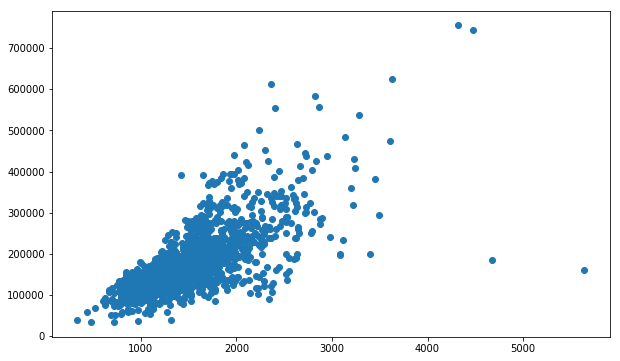

In [103]:
'''The authors of the data suggested removing the two houses with the largest GrLivArea, suggesting they were unusual sales
with huge lots. We can show this graphically to justify removing these two outliers (Id=1299 and 524)'''

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(amesNoNAs['GrLivArea'], amesNoNAs['SalePrice'])

In [104]:
amesNoNAs = amesNoNAs.drop([524,1299], axis=0)

In [105]:
'''Reading the data description and looking at the numbers. We essentially have 1sfFlrSF and 2ndFlrSF (TotalSF), 
and LowQualSF. GrLivArea is the sum of all three (every single time). So it can be eliminated'''

amesNoNAs = amesNoNAs.drop(['GrLivArea'], axis=1)

In [106]:
#Remove MiscFeature
amesNoNAs = amesNoNAs.drop('MiscFeature', axis=1)
print(amesNoNAs.shape)

(1458, 70)


## Create finalized DF with dummy variables (one all-dummy, one with numerical ordinal categories)

In [107]:
#Define function to replace all categorical variables (from a list) with dummies in a given Df:
def ReplaceWithDummies(df, dummylist):
    df2 = df.copy()
    for var in dummylist:
        topindex = df2[var].value_counts().sort_values(ascending=False).index[0]
        dummies = pd.get_dummies(df2[var], prefix=var)
        dummies = dummies.drop(var + "_" + str(topindex), axis=1)
        df2 = pd.concat([df2, dummies], axis=1)
        df2 = df2.drop(var, axis=1)
    return df2

In [108]:
#Make Dummiefor all Catagorical Values (including Ordinal) first, except for the "joint" categories:
amesNoNAsDummies = ReplaceWithDummies(amesNoNAs, PureCategorical)
amesNoNAsDummies = ReplaceWithDummies(amesNoNAsDummies, QuesCategorical)
amesNoNAsDummies = ReplaceWithDummies(amesNoNAsDummies, OrdCategorical)
amesNoNAsDummies.shape

(1458, 223)

In [109]:
#Check out value counts for the two Joint categories:
print(amesNoNAs['Condition1'].value_counts())
print(amesNoNAs['Condition2'].value_counts())
print(amesNoNAs['Exterior1st'].value_counts())
print(amesNoNAs['Exterior2nd'].value_counts())

Norm      1260
Feedr       80
Artery      48
RRAn        26
PosN        18
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64
Norm      1444
Feedr        6
Artery       2
RRNn         2
PosA         1
RRAe         1
PosN         1
RRAn         1
Name: Condition2, dtype: int64
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     60
BrkFace     50
WdShing     26
Stucco      24
AsbShng     20
Stone        2
BrkComm      2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     59
Wd Shng     38
Stucco      25
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64


In [110]:
#Make Dummy DF adding these together
Cond1DF = pd.get_dummies(amesNoNAs['Condition1'], prefix='Condition1')
Cond2DF = pd.get_dummies(amesNoNAs['Condition2'], prefix='Condition2')
Ext1DF = pd.get_dummies(amesNoNAs['Exterior1st'], prefix='Exterior1')
Ext2DF = pd.get_dummies(amesNoNAs['Exterior2nd'], prefix='Exterior2')
Joint = pd.concat([Cond1DF, Cond2DF, Ext1DF, Ext2DF], axis=1)
Joint.head()

'''There is a typographical error in the Kaggle data! For variable Exterior1st, there is a CemntBd entry, and for
Exterior2nd, there is a CmentBd entry. These are clearly the same, so let's fix them.

We have a similar problem for WdShing and Wd Shng and BrkComm/Brk Cmn'''

Joint['Exterior2_CemntBd'] = Joint['Exterior2_CmentBd'].copy()
Joint = Joint.drop('Exterior2_CmentBd', axis=1)

Joint['Exterior2_WdShing'] = Joint['Exterior2_Wd Shng'].copy()
Joint = Joint.drop('Exterior2_Wd Shng', axis=1)

Joint['Exterior2_BrkComm'] = Joint['Exterior2_Brk Cmn'].copy()
Joint = Joint.drop('Exterior2_Brk Cmn', axis=1)


#Now, combine 1 and 2 columns and drop each individual component:
for var in amesNoNAs['Condition1'].value_counts().index:
    if var=="RRNe":
        continue
    Joint['Condition_' + var] = Joint['Condition1_' + var] + Joint['Condition2_' + var]
    Joint = Joint.drop('Condition1_' + var, axis=1)
    Joint = Joint.drop('Condition2_' + var, axis=1)
    
for var in amesNoNAs['Exterior1st'].value_counts().index:
    Joint['Exterior_' + var] = Joint['Exterior1_' + var] + Joint['Exterior2_' + var]
    Joint = Joint.drop('Exterior1_' + var, axis=1)
    Joint = Joint.drop('Exterior2_' + var, axis=1)   

In [111]:
#Check Joint to see how it looks:
Joint.head()

,Condition1_RRNe,Exterior2_Other,Condition_Norm,Condition_Feedr,Condition_Artery,Condition_RRAn,Condition_PosN,Condition_RRAe,Condition_PosA,Condition_RRNn,...,Exterior_CemntBd,Exterior_BrkFace,Exterior_WdShing,Exterior_Stucco,Exterior_AsbShng,Exterior_Stone,Exterior_BrkComm,Exterior_AsphShn,Exterior_ImStucc,Exterior_CBlock
Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,2,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
#We need to rename Condition1_RRNe, Exterior2_Other, remove the two most common columns (Condition_Norm and Exterior_VinylSd), and convert any 2 to a 1:

Joint['Condition_RRNe'] = Joint['Condition1_RRNe'].copy()
Joint = Joint.drop('Condition1_RRNe', axis=1)

Joint['Exterior_Other'] = Joint['Exterior2_Other'].copy()
Joint = Joint.drop('Exterior2_Other', axis=1)

Joint = Joint.drop('Condition_Norm', axis=1)
Joint = Joint.drop('Exterior_VinylSd', axis=1)

for var in Joint.columns:
    Joint[var] = Joint[var].replace(2, 1)
    
Joint.head()

,Condition_Feedr,Condition_Artery,Condition_RRAn,Condition_PosN,Condition_RRAe,Condition_PosA,Condition_RRNn,Exterior_HdBoard,Exterior_MetalSd,Exterior_Wd Sdng,...,Exterior_WdShing,Exterior_Stucco,Exterior_AsbShng,Exterior_Stone,Exterior_BrkComm,Exterior_AsphShn,Exterior_ImStucc,Exterior_CBlock,Condition_RRNe,Exterior_Other
Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
#This all looks good -- now we can combine this DF with amesNoNAsDummies:
amesNoNAsDummies = pd.concat([amesNoNAsDummies, Joint], axis=1)
amesNoNAsDummies = amesNoNAsDummies.drop(['Condition1', 'Condition2', 'Exterior1st', 'Exterior2nd'], axis=1)
amesNoNAsDummies.shape

(1458, 242)

In [114]:
#Finally, let's make sure everything in the DF is numerical:
#for var in amesNoNAsDummies:
#    amesNoNAsDummies[var] = pd.to_numeric(amesNoNAsDummies[var])

In [115]:
#No, they aren't! Remember, we added "No" to some numerical variables representing things like "BsmtSize" and other features. Let's replace these with 0:
for var in amesNoNAsDummies:
    amesNoNAsDummies[var] = amesNoNAsDummies[var].replace("No", 0)

In [116]:
#Now, let's check if everything in the DF is numerical:
for var in amesNoNAsDummies:
    amesNoNAsDummies[var] = pd.to_numeric(amesNoNAsDummies[var])
    
#Yes! Everything converted over to numeric

In [117]:
#FINALLY, let's convert year numbers to "Years since..." numbers (2010 will be 1, 1999 will be 12, etc):
YearCategories = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt','YrSold']
for var in YearCategories:
    amesNoNAsDummies[var] = 2011-amesNoNAsDummies[var]

In [118]:
amesNoNAsDummies['YearsAgoBuilt'] = amesNoNAsDummies['YearBuilt'].copy()
amesNoNAsDummies['YearsSinceRemodel'] = amesNoNAsDummies['YearRemodAdd'].copy()
amesNoNAsDummies['GarageAge'] = amesNoNAsDummies['GarageYrBlt'].copy()
amesNoNAsDummies['YearsSinceSale'] = amesNoNAsDummies['YrSold'].copy()

amesNoNAsDummies = amesNoNAsDummies.drop(['YearBuilt', 'YearRemodAdd', 'GarageYrBlt','YrSold'], axis=1)
amesNoNAsDummies.head()

,LotFrontage,LotArea,MasVnrArea,TotalBsmtSF,LowQualFinSF,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,...,Exterior_BrkComm,Exterior_AsphShn,Exterior_ImStucc,Exterior_CBlock,Condition_RRNe,Exterior_Other,YearsAgoBuilt,YearsSinceRemodel,GarageAge,YearsSinceSale
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,196.0,856,0,3,1,8,0,2,...,0,0,0,0,0,0,8,8,8.0,3
2,80.0,9600,0.0,1262,0,3,1,6,1,2,...,0,0,0,0,0,0,35,35,35.0,4
3,68.0,11250,162.0,920,0,3,1,6,1,2,...,0,0,0,0,0,0,10,9,10.0,3
4,60.0,9550,0.0,756,0,3,1,7,1,3,...,0,0,0,0,0,0,96,41,13.0,5
5,84.0,14260,350.0,1145,0,4,1,9,1,3,...,0,0,0,0,0,0,11,11,11.0,3


In [119]:
#now rename the DF for clarity
AmesDummies = amesNoNAsDummies.copy()
AmesDummies.shape

(1458, 242)

## Convert ordinal categorical columns to singular numerical columns (this will give us 2 DFs to compare -- AmesDummies with all dummies, and AmesOrdinal with fewer columns and ordinal categories converted to numbers

In [120]:
#Define a function to convert AmesDummies to a partial ordinal DF, given a column name and ordinal list (which we need to suply ourselves!)
def ConvertToOrdinal(df, var, ordinallist, defaultsum=0, exceptions=[], startat=1):
    '''df = date frame you want to update
    
        var = variable you want to convert to numerical.
        
        ordinallist = list of possible values in order from worst to best
        
        defaultsum = **Important -- for each variable, we dropped the most common variable. So for every run,
        you will be told at least one missing entry. This is the most common entry that was dropped.
        You need to supply the value of that missing entry on the numerical scale, then fill the value in 
        in exceptions (See next)
        
        exceptions =  a list of exceptions to skip (some values are listed in the description
        but actually never show up in the data and are therefore not recognized. Add to this if you
        get error messages when running the function.
        
        startat = what numerical value to start at (do not use 0. Minimum 1, but could be higher for some reason))'''
    df2 = df.copy()
    df2[var] = 0
    
    
    for i in range(len(ordinallist)):
        if ordinallist[i] in exceptions:
            continue
        factor = i + startat
        df2[var] += df2[var + "_" + ordinallist[i]] * factor
        df2 = df2.drop(var + "_" + ordinallist[i], axis=1)
    for i in df2.index:
        if df2.loc[i, var] == 0:
            df2.loc[i, var] = defaultsum
    return df2
        
        

In [121]:
#This is a reminder of the ordinal categorical variables:
OrdCategorical = ['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
                 'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond',
                 'PavedDrive', 'PoolQC','Fence']

In [122]:
#Let's try this with "OverallQual":
AmesDummiesOrdinal = ConvertToOrdinal(AmesDummies, 'OverallQual', ['1','2','3','4','5','6','7','8','9','10'], exceptions=['5'], defaultsum=5)

In [123]:
#A test showed that a) rating '5' was an exception we had to enter, and b) we dropped 8 columns overall (9 rating columns replaced with one overall column)
print(AmesDummies.shape)
print(AmesDummiesOrdinal.shape)
print(AmesDummiesOrdinal['OverallQual'].head())
print(AmesDummiesOrdinal['OverallQual'].value_counts())

(1458, 242)
(1458, 234)
Id
1    7
2    6
3    7
4    7
5    8
Name: OverallQual, dtype: int64
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     16
2       3
1       2
Name: OverallQual, dtype: int64


In [124]:
#Let's do this with the rest of the ordinal categorical variables:
AmesDummiesOrdinal = ConvertToOrdinal(AmesDummiesOrdinal, 'OverallCond', ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'], exceptions=['5', '10'], defaultsum=5)

In [125]:
AmesDummiesOrdinal = ConvertToOrdinal(AmesDummiesOrdinal, 'ExterQual', ['Po', 'Fa', 'TA', 'Gd', 'Ex'], exceptions=['Po', 'TA'], defaultsum=3)

In [126]:
AmesDummiesOrdinal = ConvertToOrdinal(AmesDummiesOrdinal, 'ExterCond', ['Po', 'Fa', 'TA', 'Gd', 'Ex'], exceptions=['TA'], defaultsum=3)

In [127]:
AmesDummiesOrdinal = ConvertToOrdinal(AmesDummiesOrdinal, 'BsmtQual', ['No', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], defaultsum=4, exceptions=['Po', 'TA'])

In [128]:
AmesDummiesOrdinal = ConvertToOrdinal(AmesDummiesOrdinal, 'BsmtCond', ['No', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], defaultsum=4, exceptions=['TA', 'Ex'])

In [129]:
AmesDummiesOrdinal = ConvertToOrdinal(AmesDummiesOrdinal, 'BsmtExposure', ['No', 'Mn', 'Av', 'Gd'], defaultsum=1, exceptions=['No'])

In [130]:
AmesDummiesOrdinal = ConvertToOrdinal(AmesDummiesOrdinal, 'HeatingQC', ['Po', 'Fa', 'TA', 'Gd', 'Ex'], exceptions=['Ex'], defaultsum=5)

In [131]:
AmesDummiesOrdinal = ConvertToOrdinal(AmesDummiesOrdinal, 'KitchenQual', ['Po', 'Fa', 'TA', 'Gd', 'Ex'], exceptions=['Po', 'TA'], defaultsum=3)

In [132]:
AmesDummiesOrdinal = ConvertToOrdinal(AmesDummiesOrdinal, 'Functional', ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'], exceptions=['Sal', 'Typ'], defaultsum=8)

In [133]:
AmesDummiesOrdinal = ConvertToOrdinal(AmesDummiesOrdinal, 'FireplaceQu', ['No', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], exceptions=['No'], defaultsum=1)

In [134]:
AmesDummiesOrdinal = ConvertToOrdinal(AmesDummiesOrdinal, 'GarageFinish', ['No', 'Unf', 'RFn', 'Fin'], exceptions=['Unf'], defaultsum=2)

In [135]:
AmesDummiesOrdinal = ConvertToOrdinal(AmesDummiesOrdinal, 'GarageQual', ['No', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], exceptions=['TA'], defaultsum=4)

In [136]:
AmesDummiesOrdinal = ConvertToOrdinal(AmesDummiesOrdinal, 'GarageCond', ['No', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], exceptions=['TA'], defaultsum=4)

In [137]:
AmesDummiesOrdinal = ConvertToOrdinal(AmesDummiesOrdinal, 'PavedDrive', ['N', 'P', 'Y'], exceptions=['Y'], defaultsum=3)

In [138]:
AmesDummiesOrdinal = ConvertToOrdinal(AmesDummiesOrdinal, 'PoolQC', ['No', 'Fa', 'TA', 'Gd', 'Ex'], exceptions=['No', 'TA'], defaultsum=1)

In [139]:
AmesDummiesOrdinal = ConvertToOrdinal(AmesDummiesOrdinal, 'Fence', ['No', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv'], exceptions=['No'], defaultsum=1)

In [140]:
#Check the final shape of AmesDummiesOrdinal and comparte to AmesDummies
print(AmesDummies.shape)
print(AmesDummiesOrdinal.shape)

#We see that the ordinal DF has 187 columns to the 245 in the overall dummies DF.

(1458, 242)
(1458, 184)


In [141]:
#Next, let's convert SaleMonth (1-12) into Winter (1,2,3), Sping(4,5,6), Summer(7,8,9), and Autumn (10,11,12)
AmesDummies['MoSold'] = AmesDummies['MoSold'].replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Winter', 'Winter', 'Winter', 'Spring', 'Spring', 'Spring', 'Summer', 'Summer',
                                                  'Summer', 'Autumn', 'Autumn', 'Autumn'])
AmesDummiesOrdinal['MoSold'] = AmesDummiesOrdinal['MoSold'].replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Winter', 'Winter', 'Winter', 'Spring', 'Spring', 'Spring', 'Summer', 'Summer',
                                                  'Summer', 'Autumn', 'Autumn', 'Autumn'])

AmesDummies = ReplaceWithDummies(AmesDummies, ['MoSold'])
AmesDummiesOrdinal = ReplaceWithDummies(AmesDummiesOrdinal, ['MoSold'])

In [142]:
#Let's write both of these dummified DFs to csv:
AmesDummies.to_csv('AmesDummies.csv')
AmesDummiesOrdinal.to_csv('AmesDummiesOrdinal.csv')